In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

Data in DATA_c (new CASE=2), with one-hot encoding for A=6 and unknown structure. 
Hint: in this case, M=2 hidden units with proper backward one-hot encoding (point 4) 
should do it.

In [2]:
CASE=0
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
    
#for exercise 2.1
CASE=2
if CASE==2: dname='DATA_c'
fname=dname+'/x_RBM_q0.2.dat'
    
##fname=dname+'/x_RBM_q0.1.dat'

# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print('original: ',v0[i],"\n-> changed",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=30 digits
original:  [0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0] 
-> changed [-1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1]
original:  [1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0] 
-> changed [ 1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1]
original:  [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0] 
-> changed [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1
  1 -1 -1 -1 -1 -1]
original:  [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0] 
-> changed [-1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1]
original:  [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0] 
-> changed [-1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1 -1]
original:  [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0] 

In [3]:
# v0 is the original dataset with [0,1]
# v is the modified dataset with [-1,1]

## initialize

In [4]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 6

#for exercise 2.1
if CASE==2: M=2
    
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-7.23750871e-02  1.69332041e-01]
 [-1.83649319e-01 -1.96480333e-01]
 [ 6.95008387e-01  4.92643357e-01]
 [ 3.28478948e-02  9.96123076e-02]
 [ 2.71890536e-01  4.40681227e-01]
 [ 3.56095212e-01 -4.58283368e-01]
 [ 9.72242244e-02  8.09329245e-02]
 [ 4.78328334e-01  3.13400099e-01]
 [-7.07685658e-01 -1.31466190e-01]
 [ 5.90089557e-01 -1.55057817e-01]
 [-1.90827418e-01  1.68639668e-01]
 [ 1.14867514e+00 -3.61058454e-01]
 [-2.04031173e-01  4.38834979e-02]
 [ 1.06990051e-01  1.85181391e-01]
 [ 3.32438396e-04  4.75108509e-01]
 [-2.52275895e-01 -2.93857152e-01]
 [-8.38003438e-01 -6.57878286e-01]
 [-3.04323697e-01  1.98041268e-01]
 [-4.47575432e-01  4.23652862e-02]
 [-3.76008432e-01  1.17691813e-01]
 [-8.34180519e-01 -7.05490884e-02]
 [-5.45177747e-01 -3.43206973e-01]
 [-4.62104977e-01  1.01239924e-01]
 [ 1.33637564e-01 -2.66539140e-01]
 [ 1.17127165e-01  4.77205936e-01]
 [ 2.47051403e-02  8.72124680e-02]
 [-4.19370928e-03  3.55254545e-01]
 [ 4.69234156e-01 -3.25008041e-01]
 [-5.47691834e-01

In [5]:
w.shape

(30, 2)

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


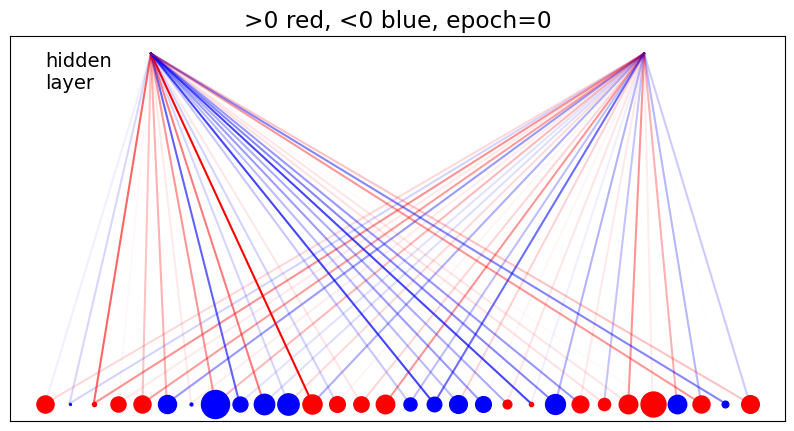

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [-1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1]
act= [ 0.70485424 -1.62002681]
prob= [0.80371996 0.03768595]
output= [ 1 -1]


array([ 1, -1])

## RBM train


In [ ]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

### 1) Use bits [0,1] or [-1,1]. Is reading weights easier in one of the two cases? 

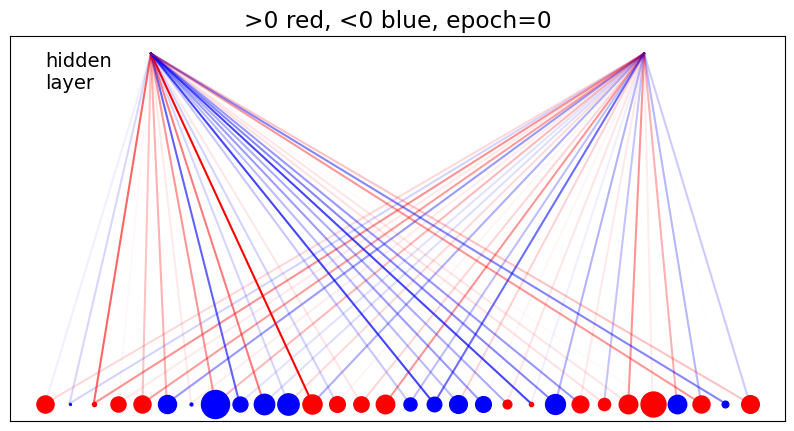

In [8]:
plotgraph(0)

----------- epoch = 0   k= 499   m= 500
dw = [[-0.108 -0.212]
 [ 0.068  0.16 ]
 [-0.53  -0.282]
 [-0.108 -0.1  ]
 [-0.2   -0.376]
 [-0.262  0.33 ]
 [-0.162 -0.094]
 [-0.306 -0.082]
 [ 0.464  0.152]
 [-0.456  0.084]
 [ 0.046  0.074]
 [-0.654  0.018]
 [ 0.192 -0.008]
 [-0.096 -0.264]
 [ 0.068 -0.444]
 [ 0.178  0.298]
 [ 0.454  0.418]
 [ 0.16   0.04 ]
 [ 0.37   0.03 ]
 [ 0.376 -0.044]
 [ 0.608  0.128]
 [ 0.396  0.3  ]
 [ 0.294  0.026]
 [-0.104  0.24 ]
 [-0.128 -0.356]
 [-0.046 -0.114]
 [-0.11  -0.154]
 [-0.358  0.126]
 [ 0.37   0.062]
 [-0.112  0.072]]
da = [-0.172  0.292  0.258 -0.04  -0.092  0.522  0.234  0.766  0.2    0.54
  0.542  0.174 -0.088 -0.096 -0.16   0.354  0.29   0.428  0.278  0.044
  0.108  0.432 -0.134  0.064 -0.124 -0.446  0.418  0.038  0.186 -0.116]
db = [-0.012 -0.1  ]
----------- epoch = 1   k= 499   m= 500
dw = [[-0.01386139 -0.04554455]
 [ 0.00594059 -0.06534653]
 [ 0.10891089  0.0019802 ]
 [ 0.00990099 -0.05346535]
 [-0.01386139 -0.02574257]
 [-0.05742574  0.1009901 

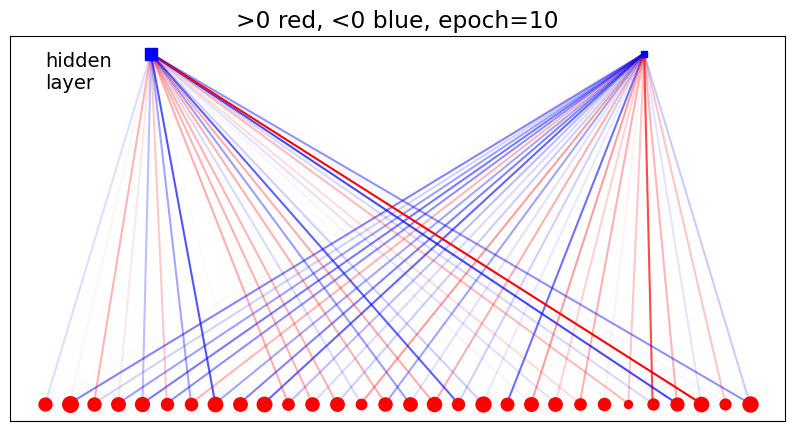

l_rate =  0.9090909090909092
weights: [[-0.01787958  0.0037717 ]
 [ 0.00536288 -0.06539239]
 [ 0.03936848 -0.02439891]
 [ 0.0134193  -0.05085927]
 [-0.03450417 -0.07009337]
 [ 0.02882908 -0.05898282]
 [-0.04768887  0.03838164]
 [-0.09086939 -0.04702028]
 [ 0.00281633 -0.065207  ]
 [ 0.00034583 -0.08121402]
 [ 0.04258525 -0.03588471]
 [ 0.04065438 -0.01959206]
 [ 0.03990254 -0.0267914 ]
 [-0.02003984  0.05114375]
 [ 0.04180272 -0.04829345]
 [-0.05165247 -0.01604159]
 [ 0.04355291  0.04202248]
 [-0.08356908 -0.02509724]
 [-0.026206   -0.01196559]
 [ 0.00236318 -0.07568598]
 [-0.00581385  0.05047823]
 [-0.01586823  0.02379927]
 [ 0.01864421  0.04146764]
 [ 0.00062886  0.00671011]
 [ 0.03592862  0.02967413]
 [-0.02162478  0.09589784]
 [-0.09724965  0.03896091]
 [ 0.13444393 -0.01481336]
 [-0.00409291  0.03078179]
 [-0.05736996 -0.02749241]]


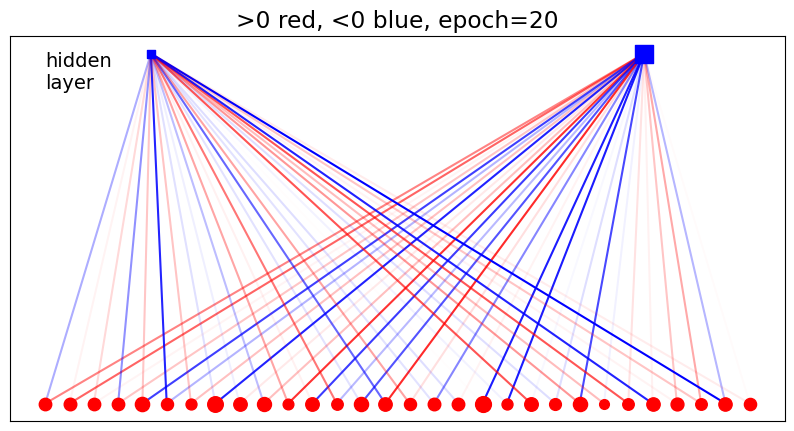

l_rate =  0.8333333333333337
weights: [[-0.02616669  0.03929319]
 [ 0.00373909  0.04928058]
 [ 0.01218525  0.00359504]
 [-0.03491239  0.01833402]
 [ 0.01794256 -0.06093973]
 [-0.06941351 -0.02376016]
 [ 0.01875648  0.01998437]
 [-0.00979308 -0.07042414]
 [-0.00519157  0.00702151]
 [-0.02093343  0.02035481]
 [ 0.02855028  0.06499634]
 [ 0.00455244 -0.0621918 ]
 [ 0.04338976 -0.02226398]
 [-0.00908731 -0.05459646]
 [-0.04808183  0.0676789 ]
 [ 0.02909854  0.01020419]
 [-0.00932116 -0.03845133]
 [-0.01033657  0.00377439]
 [ 0.00073861 -0.07189961]
 [-0.00405784 -0.07226876]
 [ 0.05429601 -0.00219955]
 [-0.0104955  -0.01035619]
 [ 0.03331712 -0.05810209]
 [ 0.02118955 -0.00458859]
 [ 0.05380859  0.00924727]
 [-0.07028905  0.00429822]
 [ 0.00384458  0.01852067]
 [ 0.01857916  0.02734416]
 [-0.08087947 -0.02300225]
 [ 0.00589102  0.00142142]]


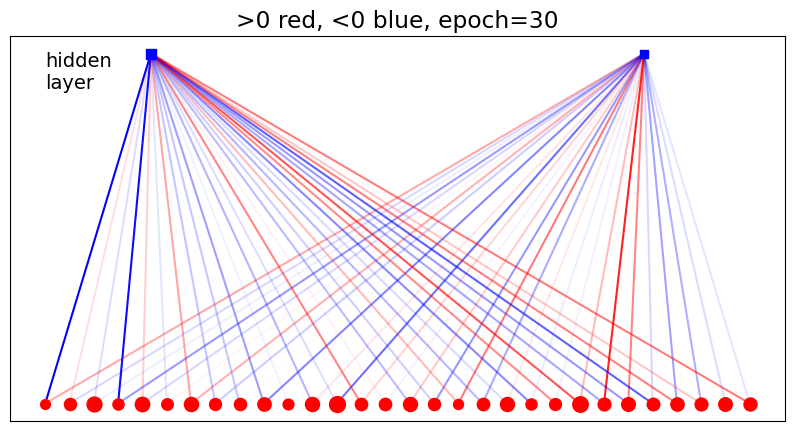

l_rate =  0.7692307692307697
weights: [[-0.1381479   0.04629439]
 [ 0.01666847 -0.02091527]
 [-0.01829738 -0.00928089]
 [-0.13159813 -0.05452698]
 [ 0.02600549 -0.02163865]
 [-0.01459291  0.00565126]
 [ 0.04823026  0.04215067]
 [-0.03149846 -0.02701216]
 [-0.03027377  0.0023951 ]
 [-0.05211485 -0.06566843]
 [-0.00682946  0.00025978]
 [-0.04079566  0.01370851]
 [-0.01847001 -0.07737581]
 [ 0.06570397  0.02220882]
 [ 0.0071497  -0.00615763]
 [-0.03659774  0.02808636]
 [-0.02594455 -0.05596923]
 [ 0.03646423  0.07209007]
 [-0.03891538 -0.04518588]
 [-0.02064925  0.01258622]
 [-0.06418973 -0.00956175]
 [ 0.06288703 -0.00753664]
 [ 0.09212426  0.03642405]
 [-0.04839701  0.12016314]
 [-0.05590004  0.06621111]
 [-0.08609156 -0.02107416]
 [ 0.06833553 -0.04959558]
 [ 0.03044109 -0.04325476]
 [ 0.00220955 -0.01882664]
 [ 0.07068735 -0.01400533]]


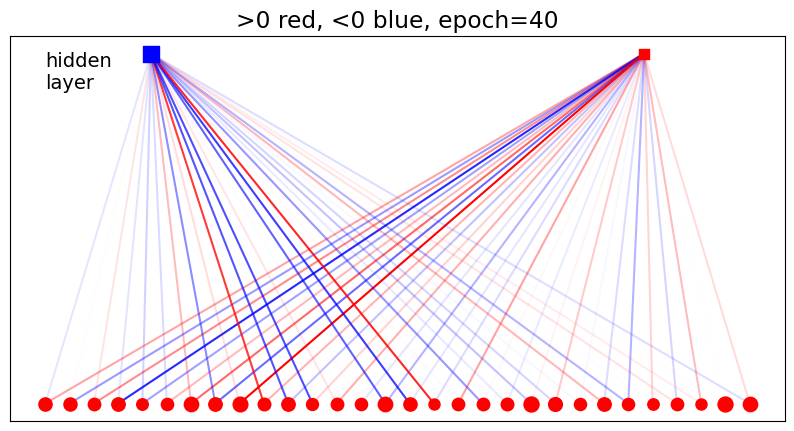

l_rate =  0.7142857142857149
weights: [[-0.0108937   0.03789994]
 [ 0.00106414 -0.04234636]
 [ 0.01123077  0.04815252]
 [-0.01154133 -0.09085261]
 [-0.01908586 -0.03933437]
 [-0.01531968  0.02875139]
 [ 0.02817018  0.06313454]
 [-0.04790538 -0.06206861]
 [ 0.01448201  0.10711014]
 [ 0.08281831  0.03137896]
 [-0.07192036 -0.0260977 ]
 [-0.07414824  0.01846325]
 [ 0.01089799  0.0335503 ]
 [-0.00128564 -0.01100651]
 [-0.065883   -0.03163371]
 [-0.08136583 -0.01061909]
 [ 0.09102498 -0.01518938]
 [ 0.0020148   0.03825893]
 [-0.04358726  0.00289129]
 [-0.00934276 -0.00837679]
 [-0.02574163  0.00494193]
 [-0.01800598  0.02206321]
 [-0.00288642 -0.00280709]
 [ 0.03040266 -0.01430984]
 [-0.03172677 -0.03162931]
 [-0.00067713  0.01825725]
 [ 0.01197033 -0.01750876]
 [ 0.007924    0.02794693]
 [-0.00086092 -0.00032478]
 [-0.01425129  0.01469719]]


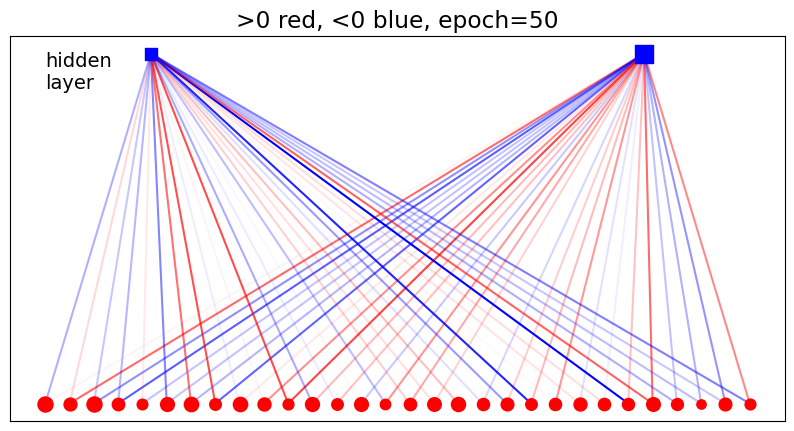

l_rate =  0.6666666666666671
weights: [[-0.02326187  0.0032819 ]
 [ 0.0112413   0.04426008]
 [-0.01651961 -0.03290547]
 [-0.02137454 -0.04799322]
 [ 0.00690741 -0.01766602]
 [-0.03602353 -0.01813426]
 [ 0.04225086 -0.02218697]
 [ 0.05192845 -0.04593817]
 [-0.00546673  0.00674869]
 [ 0.0034004   0.03274329]
 [ 0.05307025  0.05528555]
 [-0.02445317  0.02010069]
 [-0.00559383  0.01838658]
 [-0.00198366 -0.01611592]
 [-0.01936655  0.03106086]
 [ 0.0140526   0.02528477]
 [ 0.00911695  0.0129166 ]
 [ 0.01877757  0.00037944]
 [-0.00938728 -0.01212893]
 [-0.02946723  0.0143158 ]
 [-0.06470634  0.01977107]
 [ 0.00211259  0.03049345]
 [ 0.0079599  -0.00857582]
 [ 0.01012928 -0.00467471]
 [-0.07550621  0.01813137]
 [ 0.04645543  0.04366377]
 [-0.02409467 -0.01781122]
 [-0.01972029 -0.02297416]
 [-0.01647577 -0.03167858]
 [-0.03796214  0.03488793]]


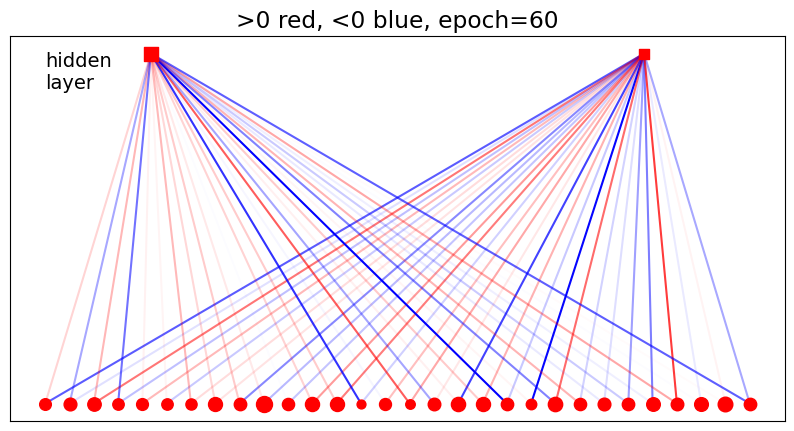

l_rate =  0.6250000000000006
weights: [[ 0.01477623 -0.05668575]
 [-0.03040752 -0.01060644]
 [ 0.02485542  0.0473222 ]
 [-0.04872136 -0.0221837 ]
 [ 0.00494527  0.02417891]
 [ 0.00365912 -0.01861337]
 [ 0.02427081  0.01192133]
 [ 0.01384663  0.00974871]
 [ 0.0178631  -0.04107393]
 [ 0.0076842  -0.02433425]
 [-0.00120451 -0.02039083]
 [ 0.01521228  0.03448661]
 [ 0.01782533  0.04514014]
 [-0.07079533 -0.01627798]
 [-0.00321665  0.02212437]
 [ 0.05609517  0.03017552]
 [-0.03112576  0.00842778]
 [ 0.00521536 -0.06540743]
 [ 0.01821119  0.02647041]
 [-0.08810323 -0.01893861]
 [ 0.00341084 -0.0863429 ]
 [-0.0432534   0.05129751]
 [ 0.0257476  -0.01557304]
 [-0.00758394 -0.01135689]
 [-0.01830163 -0.03292427]
 [-0.0053854  -0.04469178]
 [ 0.03052374  0.06756356]
 [-0.00111444 -0.00722021]
 [ 0.00121269  0.00403406]
 [-0.05578802 -0.02995572]]


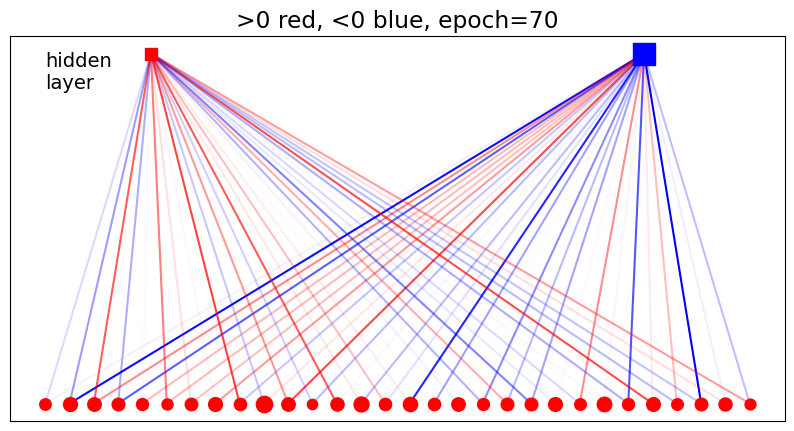

l_rate =  0.5882352941176475
weights: [[-0.01248264 -0.00455507]
 [-0.03270093 -0.08114698]
 [ 0.0540207   0.03835068]
 [-0.02746758 -0.05401128]
 [ 0.00221235  0.02262922]
 [ 0.04303137  0.02296189]
 [ 0.01075567  0.02113217]
 [ 0.00333858  0.03341444]
 [ 0.06309164 -0.01931278]
 [-0.01861735  0.00802662]
 [ 0.03361316  0.06085598]
 [-0.01610615 -0.02304926]
 [ 0.05427301 -0.00220851]
 [ 0.00757579 -0.0225665 ]
 [ 0.0212322  -0.00999022]
 [ 0.00609397 -0.07276588]
 [ 0.00133287 -0.03088958]
 [-0.00386838  0.00140897]
 [-0.02547581 -0.03843497]
 [ 0.02723803 -0.02277365]
 [-0.04138105 -0.03067503]
 [-0.00755866  0.00157908]
 [-0.01305807  0.03796465]
 [ 0.00254242  0.00407897]
 [-0.02720269 -0.05701457]
 [ 0.05912637  0.00734599]
 [-0.02288746  0.02210889]
 [-0.01986052 -0.08507003]
 [ 0.01072382 -0.00532919]
 [ 0.03261193 -0.02128436]]


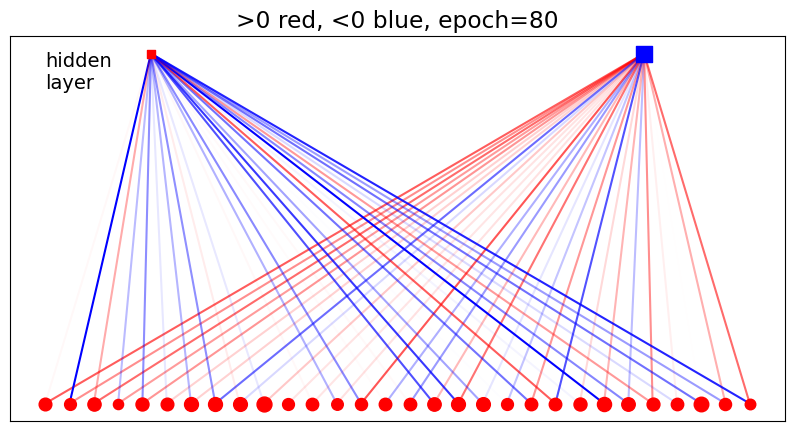

l_rate =  0.555555555555556
weights: [[ 1.98298774e-03  4.65424386e-02]
 [-7.26645582e-02  3.21862099e-02]
 [ 2.39666603e-02  4.21184485e-02]
 [-1.92765116e-02  2.84434821e-02]
 [-3.21573574e-02  3.02921331e-02]
 [-6.73334885e-03  1.31145074e-02]
 [-2.11600287e-02  1.29769256e-02]
 [-3.19107383e-02 -4.20013454e-02]
 [ 5.40638436e-03 -1.10543433e-02]
 [-6.58391645e-03  1.56798899e-02]
 [ 4.17803577e-05  8.03118179e-03]
 [ 1.89723713e-03  7.37467445e-03]
 [-2.21798059e-02  8.55381782e-03]
 [-3.36805779e-02  4.82242925e-02]
 [ 1.24993131e-03 -2.27831914e-02]
 [ 1.67732199e-03 -2.88156185e-02]
 [-4.97659424e-02  2.00320924e-02]
 [-5.67831231e-02  3.99294533e-02]
 [-2.61017130e-02 -7.40174144e-03]
 [-5.04507773e-04 -1.69402839e-02]
 [-4.02167361e-02  2.95477328e-02]
 [ 4.63133818e-02 -4.94385573e-02]
 [-3.23014572e-03  1.07743674e-02]
 [-7.20009076e-02  2.13930185e-02]
 [-3.46513396e-02 -1.87964203e-02]
 [ 2.91853042e-02  3.18869657e-02]
 [-1.09019100e-02  4.56831300e-03]
 [-4.08671386e-02 

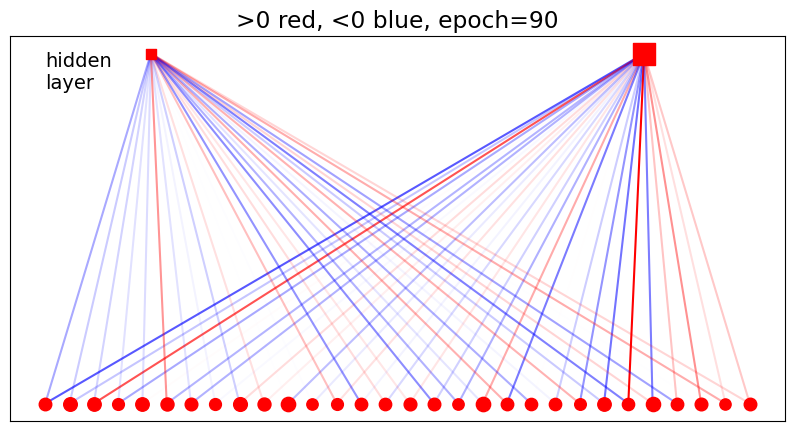

l_rate =  0.5263157894736847
weights: [[-0.03401786 -0.06600239]
 [-0.02037787 -0.02276486]
 [-0.01724537  0.0681039 ]
 [-0.01189811 -0.03408501]
 [-0.01390702  0.00118678]
 [ 0.04201313 -0.02976476]
 [-0.01148005 -0.0306213 ]
 [-0.00481905 -0.0023033 ]
 [-0.01898154  0.01394768]
 [ 0.01242635  0.00622564]
 [-0.00048886 -0.02574399]
 [-0.00069255 -0.00812423]
 [ 0.02512344  0.01177046]
 [-0.0427403  -0.00480631]
 [ 0.01383398 -0.01556991]
 [ 0.00982678  0.01036694]
 [-0.04518923 -0.01873946]
 [-0.03056644 -0.03141041]
 [-0.01052621  0.03300641]
 [ 0.0311244  -0.05220229]
 [-0.03239837  0.00041667]
 [-0.00449151 -0.01973785]
 [ 0.03060045 -0.04216936]
 [-0.02113024 -0.05515777]
 [-0.04998947  0.10076063]
 [ 0.0171403  -0.05136029]
 [-0.03678171  0.02341418]
 [-0.00048348  0.04351676]
 [ 0.03263136  0.0126305 ]
 [ 0.01646308  0.02172055]]


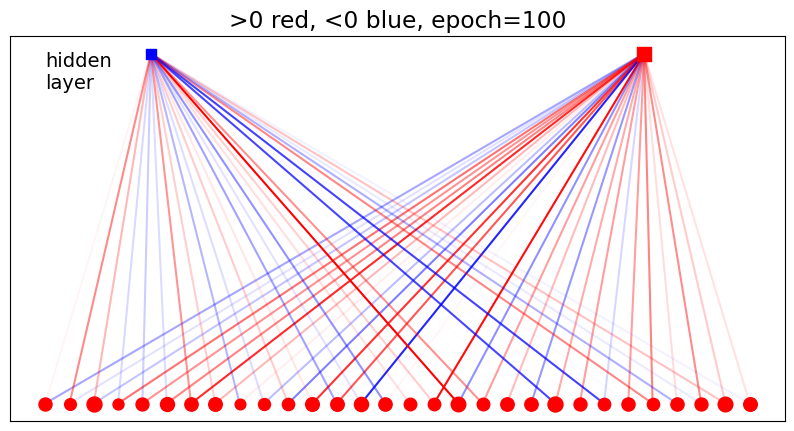

l_rate =  0.5000000000000009
weights: [[ 3.31447691e-03 -2.71341456e-02]
 [ 3.55857400e-02 -8.91941594e-03]
 [ 2.20382030e-02 -1.79154283e-02]
 [-1.15228067e-02  4.35259394e-02]
 [-1.50998875e-02  3.32991049e-02]
 [-1.06148846e-02  3.77971885e-02]
 [ 3.25353885e-02  6.53514664e-02]
 [ 1.45823738e-02  2.17878243e-02]
 [-2.23367087e-02  5.32216280e-03]
 [-1.02524217e-02 -1.96894731e-02]
 [ 1.54054236e-02 -3.87524821e-02]
 [ 7.36620513e-03  6.26419456e-02]
 [-2.81285244e-02  5.16235324e-02]
 [-8.97877816e-03 -6.67927526e-02]
 [-3.30993957e-02  2.73979373e-03]
 [ 9.69152752e-03  5.42617085e-05]
 [ 1.52795779e-02  7.39562988e-02]
 [ 7.77124539e-02 -3.38799273e-02]
 [ 3.38512213e-02  2.96894661e-02]
 [-7.57761508e-04  2.04896718e-02]
 [-7.04718454e-04 -3.15280212e-02]
 [-5.64429220e-02  2.56941874e-02]
 [ 9.83367323e-04  2.95454994e-02]
 [-5.74945432e-02 -1.25857943e-02]
 [-1.29926061e-03  2.94443501e-02]
 [ 3.68161377e-02  3.74298563e-02]
 [-2.43047888e-02  1.03865610e-02]
 [-6.26778114e-03

In [9]:
## v0 - [0,1]

# random seed for reproducibility
np.random.seed(12345)

#def RBM_train(v,w,b,a,GAP,L,M,n_epoch,l_rate = 1.0, mini=500):

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0
#m=0 #counter

n_epoch =100
list_w = []
# train model
print('===================================================')
for epoch in range(n_epoch):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v0[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v0[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v0[k].T,h)
        vh_model+= np.outer(vf.T,hf)

        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
            list_w.append(w)

    # randomize the order of input data
    np.random.shuffle(v0)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)
        print('weights:', w)

In [ ]:
w.shape

In [28]:
ww = np.asarray(list_w)

In [30]:
ww[:,:,0].shape

(2000, 30)

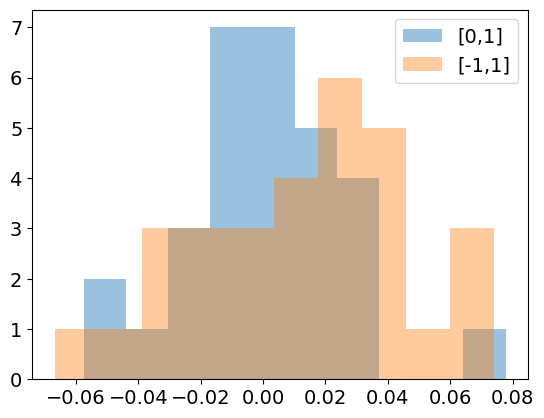

In [34]:
plt.hist(ww[-1,:,0],alpha=0.45,label='[0,1]')
plt.hist(ww[-1,:,1],alpha=0.4,label='[-1,1]')
plt.legend()

In [ ]:
## v - [-1,1]

# random seed for reproducibility
np.random.seed(12345)

#def RBM_train(v,w,b,a,GAP,L,M,n_epoch,l_rate = 1.0, mini=500):

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0
#m=0 #counter

n_epoch =100

# train model
print('===================================================')
for epoch in range(n_epoch):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)

        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0

    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)
        print('weights:', w)

In [ ]:
# create a plot of weights vs. epochs

In [ ]:
#N1=12
df0 = pd.DataFrame(v0)#[:N1])
df1 = pd.DataFrame(v)#[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

In [ ]:
# [0,1]
RBM_train(v0,w,b,a,GAP,L,M,n_epoch=100,l_rate = 1.0, mini=500)

In [ ]:
# [-1,1]
RBM_train(v,w,b,a,GAP,L,M,n_epoch=100,l_rate = 1.0, mini=500)

In [ ]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

## Test: noise reduction

In [ ]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)